# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save the needed information into arrays
all_cities = []
lon = []
lat = []
lat = []
max_temp = []
humidity = []
clouds = []
winds = []
country = []
temp_date = []

# Initial counters
count = 0
set = 1

# Start the url for the api call
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # If there have been 50 calls, make it sleep so we don't do too many calls in api limit
    if count == 49:
        time.sleep(1)
        count = 0
        set+= 1
    else:
        count +=1
     
    # Reguest the data and convert to json
    response = requests.get(url + city).json()
    
    # Try to get the data from the response
    try:
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        temp_date.append(response['dt'])
        all_cities.append(city)
        
        print(f"Processing Record {count} of set {set} | {city}")
        
    # If the api call did not work
    except:
        print(f"{city} not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | mataura
Processing Record 2 of set 1 | puerto escondido
Processing Record 3 of set 1 | kapaa
Processing Record 4 of set 1 | mahebourg
Processing Record 5 of set 1 | leningradskiy
Processing Record 6 of set 1 | estacion coahuila
marcona not found. Skipping...
Processing Record 8 of set 1 | vardo
Processing Record 9 of set 1 | bredasdorp
Processing Record 10 of set 1 | codrington
Processing Record 11 of set 1 | ancud
Processing Record 12 of set 1 | karaton
Processing Record 13 of set 1 | bambous virieux
attawapiskat not found. Skipping...
Processing Record 15 of set 1 | college
Processing Record 16 of set 1 | salalah
Processing Record 17 of set 1 | carballo
Processing Record 18 of set 1 | qandala
Processing Record 19 of set 1 | faanui
Processing Record 20 of set 1 | lompoc
Processing Record 21 of set 1 | hobart
Processing Record 22 of set 1 | san andres
Processing Record 23 of set 1 | rantepao
Processin

louisbourg not found. Skipping...
Processing Record 3 of set 5 | tautira
Processing Record 4 of set 5 | upernavik
Processing Record 5 of set 5 | karpogory
Processing Record 6 of set 5 | usinsk
Processing Record 7 of set 5 | rocha
Processing Record 8 of set 5 | hofn
Processing Record 9 of set 5 | mitsamiouli
Processing Record 10 of set 5 | bereznik
Processing Record 11 of set 5 | sao raimundo das mangabeiras
Processing Record 12 of set 5 | bam
Processing Record 13 of set 5 | nome
Processing Record 14 of set 5 | asau
lolua not found. Skipping...
Processing Record 16 of set 5 | kapuskasing
Processing Record 17 of set 5 | new norfolk
Processing Record 18 of set 5 | labuhan
Processing Record 19 of set 5 | obihiro
Processing Record 20 of set 5 | jagraon
Processing Record 21 of set 5 | bilibino
Processing Record 22 of set 5 | kismayo
Processing Record 23 of set 5 | belyy yar
Processing Record 24 of set 5 | tambopata
Processing Record 25 of set 5 | lavrentiya
Processing Record 26 of set 5 | sh

samusu not found. Skipping...
Processing Record 9 of set 9 | ahuimanu
Processing Record 10 of set 9 | singaraja
Processing Record 11 of set 9 | poronaysk
Processing Record 12 of set 9 | xam nua
Processing Record 13 of set 9 | valleyview
Processing Record 14 of set 9 | santa maria
Processing Record 15 of set 9 | trairi
Processing Record 16 of set 9 | chernyy yar
Processing Record 17 of set 9 | saint-augustin
Processing Record 18 of set 9 | san policarpo
Processing Record 19 of set 9 | cedar city
Processing Record 20 of set 9 | padang
Processing Record 21 of set 9 | narsaq
Processing Record 22 of set 9 | vermillion
Processing Record 23 of set 9 | kabansk
Processing Record 24 of set 9 | acapulco
Processing Record 25 of set 9 | aykhal
Processing Record 26 of set 9 | valparaiso
Processing Record 27 of set 9 | havelock
Processing Record 28 of set 9 | korla
Processing Record 29 of set 9 | half moon bay
Processing Record 30 of set 9 | seymchan
Processing Record 31 of set 9 | souillac
Processin

Processing Record 8 of set 13 | dudinka
Processing Record 9 of set 13 | baculin
Processing Record 10 of set 13 | shingu
Processing Record 11 of set 13 | kemin
Processing Record 12 of set 13 | rio gallegos
Processing Record 13 of set 13 | xinzhi
Processing Record 14 of set 13 | abbeville
skagastrond not found. Skipping...
inderborskiy not found. Skipping...
sataua not found. Skipping...
Processing Record 18 of set 13 | kholm-zhirkovskiy
Processing Record 19 of set 13 | nabire
Processing Record 20 of set 13 | otane
Processing Record 21 of set 13 | senanga
Processing Record 22 of set 13 | port hawkesbury
Processing Record 23 of set 13 | rovnoye
Processing Record 24 of set 13 | dondo
Processing Record 25 of set 13 | kabare
Processing Record 26 of set 13 | andenes
Processing Record 27 of set 13 | matagami
haibowan not found. Skipping...
Processing Record 29 of set 13 | lovozero
Processing Record 30 of set 13 | talnakh
camanci not found. Skipping...
Processing Record 32 of set 13 | maumere
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [135]:
# Make a dictionary
weather_dict = {
    "City": all_cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": winds,
    "Country": country,
    "Date": temp_date
}

# Convert to data frame
weather_data = pd.DataFrame(weather_dict)

# Save to .csv
weather_data.to_csv('../output_data/cities.csv')

# Print out first 5 rows
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.19,168.86,3.89,83,100,1.34,NZ,1595444293
1,puerto escondido,15.85,-97.07,29.00,74,40,5.10,MX,1595444344
2,kapaa,22.08,-159.32,26.67,100,90,1.49,US,1595444010
3,mahebourg,-20.41,57.70,20.00,68,40,5.10,MU,1595444061
4,leningradskiy,69.38,178.42,14.89,50,100,2.98,RU,1595444088


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [109]:
# Check if any cities have a humidity more than100%
humid_cities = weather_data.loc[weather_data['Humidity'] > 100, : ]
humid_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [92]:
#  Get the indices of cities that have humidity over 100%.
humid_list = humid_cities.index
humid_list

Int64Index([], dtype='int64')

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data[weather_data["Humidity"] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.19,168.86,3.89,83,100,1.34,NZ,1595444293
1,puerto escondido,15.85,-97.07,29.00,74,40,5.10,MX,1595444344
2,kapaa,22.08,-159.32,26.67,100,90,1.49,US,1595444010
3,mahebourg,-20.41,57.70,20.00,68,40,5.10,MU,1595444061
4,leningradskiy,69.38,178.42,14.89,50,100,2.98,RU,1595444088
...,...,...,...,...,...,...,...,...,...
571,orlik,52.52,99.83,12.07,83,100,0.59,RU,1595444652
572,san jose,37.34,-121.89,25.00,41,0,1.79,US,1595444653
573,flin flon,54.77,-101.86,25.00,61,40,3.10,CA,1595444360
574,benghazi,32.12,20.07,24.98,73,0,5.18,LY,1595444528


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

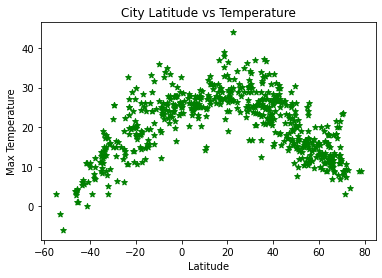

In [133]:
# Create the scattor plot graphs

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="*", color="green")
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the graph
plt.savefig('../output_data/fig1.png')

plt.show()

## Latitude vs. Humidity Plot

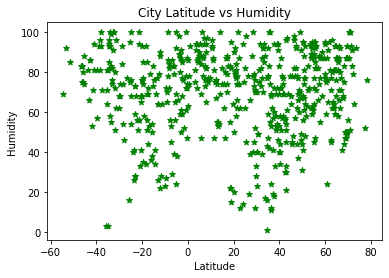

In [137]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="*", color="green")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the graph
plt.savefig("../output_data/fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

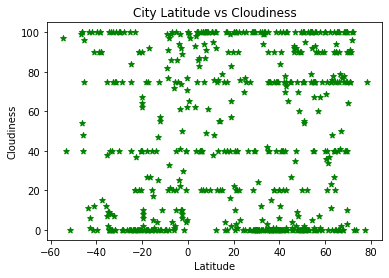

In [138]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="*", color="green")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the graph
plt.savefig("../output_data/fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

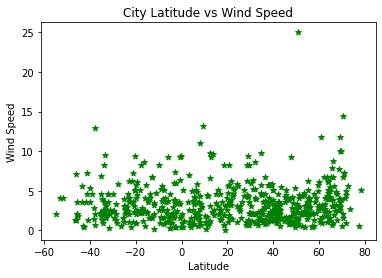

In [139]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="*", color="green")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the graph
plt.savefig("../output_data/fig4.png")

plt.show()

## Linear Regression

In [97]:
# OPTIONAL: Create a function to create Linear Regression plots

In [98]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_data = clean_city_data[clean_city_data["Lat"] > 0]
southern_city_data = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temp is: -0.72


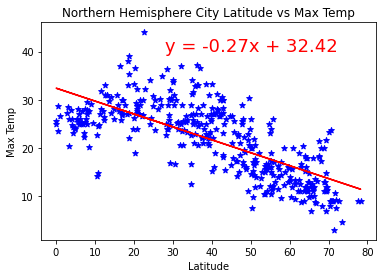

In [99]:
# Do the linear regressions

x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Max Temp"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (28,40), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The correlation between latitude and max temp is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temp is: 0.81


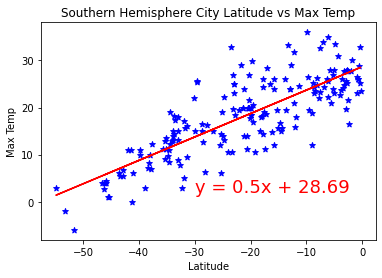

In [100]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Max Temp"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-30,2), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The correlation between latitude and max temp is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity is: 0.0


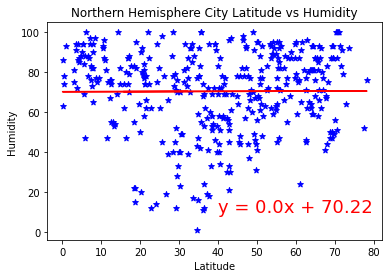

In [101]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Humidity"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (40,10), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The correlation between latitude and humidity is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity is: -0.18


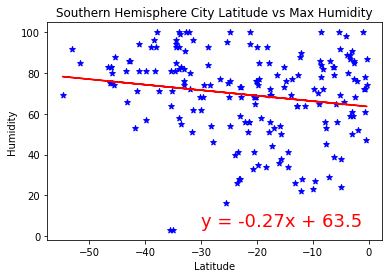

In [102]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Humidity"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-30,5), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The correlation between latitude and humidity is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is: -0.05


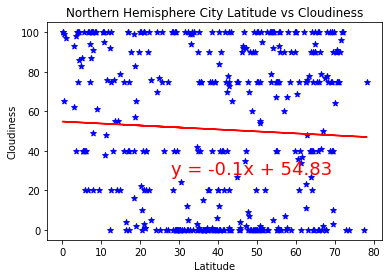

In [103]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Cloudiness"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (28,28), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The correlation between latitude and cloudiness is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is: -0.09


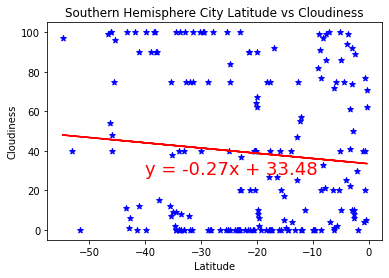

In [104]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Cloudiness"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-40,28), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The correlation between latitude and cloudiness is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is: 0.09


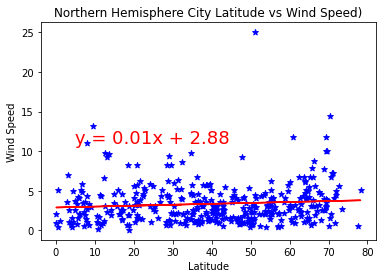

In [105]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Wind Speed"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (5,11), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The correlation between latitude and wind speed is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is: 0.02


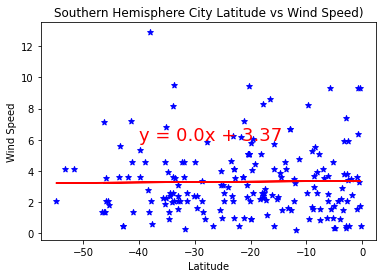

In [106]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Wind Speed"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-40,6), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The correlation between latitude and wind speed is: {round(correlation[0],2)}")

plt.show()